Çalışmada kullandığım veri setine aşağıdaki kaggle linkinden ulaşabilirsiniz:
https://www.kaggle.com/datasets/sameerhussain007/subscription-churn-dataset

Veri Setindeki Sütun İsimleri ve Açıklamaları

AccountAge: Kullanıcının hesabının yaşı (ay cinsinden).

MonthlyCharges: Kullanıcıya aylık olarak fatura edilen tutar.

TotalCharges: Kullanıcının hesap süresi boyunca ödediği toplam ücret.

SubscriptionType: Kullanıcının seçtiği abonelik türü (Basic, Standard veya Premium).

PaymentMethod: Kullanıcının kullandığı ödeme yöntemi.

PaperlessBilling: Kullanıcının kağıtsız faturalandırmayı tercih edip etmediği (Evet veya Hayır).

ContentType: Kullanıcının tercih ettiği içerik türü (Filmler, TV Dizileri veya Her İkisi).

MultiDeviceAccess: Kullanıcının birden fazla cihazda hizmete erişip erişmediği (Evet veya Hayır).

DeviceRegistered: Kullanıcının kayıtlı cihaz türü (TV, Mobil, Tablet veya Bilgisayar).

ViewingHoursPerWeek: Kullanıcının haftalık içerik izleme süresi (saat cinsinden).

AverageViewingDuration: Kullanıcının her izleme oturumunun ortalama süresi (dakika cinsinden).

ContentDownloadsPerMonth: Kullanıcının aylık içerik indirme sayısı.

GenrePreference: Kullanıcının tercih ettiği içerik türü (tür adı).

UserRating: Kullanıcının hizmete verdiği puan (1 ile 5 arasında).

SupportTicketsPerMonth: Kullanıcının aylık olarak oluşturduğu destek talebi sayısı.

Gender: Kullanıcının cinsiyeti (Erkek veya Kadın).

WatchlistSize: Kullanıcının izleme listesindeki içerik sayısı.

ParentalControl: Kullanıcı için ebeveyn kontrolünün etkin olup olmadığı (Evet veya Hayır).

SubtitlesEnabled: Kullanıcının altyazıyı etkinleştirip etkinleştirmediği (Evet veya Hayır).

CustomerID: Her müşteri için benzersiz kimlik numarası.

Churn: Kullanıcının aboneliği sonlandırıp sonlandırmadığını gösteren hedef değişken (1: Abonelik iptal edildi, 0: Abonelik devam ediyor).

In [50]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense,LSTM, Bidirectional
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import torch
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE




In [14]:
df = pd.read_csv("sample_data/train.csv")

In [15]:
df.head(100)

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,45,10.024971,451.123689,Standard,Credit card,No,Movies,Yes,TV,38.132395,...,28,Sci-Fi,3.800887,8,Male,11,Yes,No,G2KDQ1WTT7,0
96,40,11.565217,462.608696,Standard,Electronic check,Yes,Movies,No,Tablet,7.216903,...,28,Drama,1.746446,8,Male,9,No,No,3DI0ZSVC2A,0
97,32,12.599678,403.189691,Standard,Bank transfer,Yes,TV Shows,Yes,Tablet,15.276395,...,13,Comedy,2.007952,4,Male,13,No,Yes,EJU1RDUUFC,0
98,36,10.082957,362.986452,Basic,Bank transfer,Yes,TV Shows,No,Mobile,20.917550,...,11,Fantasy,2.040472,6,Female,5,Yes,Yes,WBAI2TNVFU,0


In [16]:
df.isnull().sum()

,0
AccountAge,0
MonthlyCharges,0
TotalCharges,0
SubscriptionType,0
PaymentMethod,0
PaperlessBilling,0
ContentType,0
MultiDeviceAccess,0
DeviceRegistered,0
ViewingHoursPerWeek,0


In [17]:
print("Dataset orjinal hali: " + str(df.shape))

Dataset orjinal hali: (243787, 21)


**DATA PREPROCESSING & FEATURE ENGINEERING**

In [18]:
#Az ödeme yapıp fazla içerik tüketenler
# 'MonthlyCharges' sütununun ortalamasını hesapla
monthly_charges_mean = df['MonthlyCharges'].mean()

# 'ViewingHoursPerWeek' sütununun ortalamasını hesapla
viewing_hours_mean = df['ViewingHoursPerWeek'].mean()

# Düşük ödeme ve yüksek kullanım kombinasyonunu oluştur
df['is_low_paying_high_usage'] = ((df['MonthlyCharges'] < monthly_charges_mean) &
                                   (df['ViewingHoursPerWeek'] > viewing_hours_mean)).astype(int)

# Sonuçları görüntüleme
print(df[['CustomerID', 'MonthlyCharges', 'ViewingHoursPerWeek', 'is_low_paying_high_usage']])



        CustomerID  MonthlyCharges  ViewingHoursPerWeek  \
0       CB6SXPNVZA       11.055215            36.758104   
1       S7R2G87O09        5.175208            32.450568   
2       EASDC20BDT       12.106657             7.395160   
3       NPF69NT69N        7.263743            27.960389   
4       4LGYPK7VOL       16.953078            20.083397   
...            ...             ...                  ...   
243782  FBZ38J108Z        9.639902            13.502729   
243783  W4AO1Y6NAI       13.049257            24.963291   
243784  0H3SWWI7IU       14.514569            10.628728   
243785  63SJ44RT4A       18.140555            30.466782   
243786  A6IN701VRY       11.593774            24.972537   

        is_low_paying_high_usage  
0                              1  
1                              1  
2                              0  
3                              1  
4                              0  
...                          ...  
243782                         0  
243783     

In [19]:
#Yüksek izleme süresine rağmen churn eden kullanıcıları bulmak için şu adımları izleyebilirsiniz:
# Yoğun kullanıcıları belirleme (ViewingHoursPerWeek > ortalama)
heavy_user = (df['ViewingHoursPerWeek'] > df['ViewingHoursPerWeek'].mean()).astype(int)

# Yoğun kullanıcıların churn durumunu kontrol etme
df['heavy_user'] = heavy_user
df['heavy_user_churned'] = (df['heavy_user'] == 1) & (df['Churn'] == 1)

# Yoğun kullanıcılar arasında churn edenlerin sayısını gösterme
heavy_user_churn = df[df['heavy_user_churned'] == True]

# Sonuçları görüntüleme
print(heavy_user_churn[['CustomerID', 'ViewingHoursPerWeek', 'Churn']])


        CustomerID  ViewingHoursPerWeek  Churn
20      RS3L4B72GS            25.497399      1
33      ZSMLODNR2W            21.259971      1
39      GE07ASO3L7            29.638149      1
61      V8IGSV1OLZ            29.714403      1
82      0620UH1QTO            21.261721      1
...            ...                  ...    ...
243710  YGB4PNKO9Q            27.429948      1
243714  E0JB3AZKFQ            20.504410      1
243774  NSLRNF92UA            33.501221      1
243775  R7F8LOTNYX            26.075852      1
243777  FQ2HIE4Z9G            23.087931      1

[16873 rows x 3 columns]


In [20]:
# Yoğun kullanıcılar arasında churn edenlerin verilerini al
heavy_user_churn = df[df['heavy_user_churned'] == True]

# Churn eden yoğun kullanıcıların diğer sütunlardaki ortak özellikleri inceleme

categorical_columns = ['SubscriptionType', 'PaymentMethod', 'Gender', 'ContentType', 'DeviceRegistered', 'ParentalControl', 'SubtitlesEnabled']

# Kategorik sütunlar için değerlerin sayısını yazdırma
for col in categorical_columns:
    print(f"\n{col} sütunundaki değerler:")
    print(heavy_user_churn[col].value_counts())




SubscriptionType sütunundaki değerler:
SubscriptionType
Basic       6137
Standard    5748
Premium     4988
Name: count, dtype: int64

PaymentMethod sütunundaki değerler:
PaymentMethod
Electronic check    4513
Mailed check        4421
Bank transfer       4170
Credit card         3769
Name: count, dtype: int64

Gender sütunundaki değerler:
Gender
Male      8576
Female    8297
Name: count, dtype: int64

ContentType sütunundaki değerler:
ContentType
Both        5879
TV Shows    5501
Movies      5493
Name: count, dtype: int64

DeviceRegistered sütunundaki değerler:
DeviceRegistered
Computer    4306
Mobile      4246
Tablet      4201
TV          4120
Name: count, dtype: int64

ParentalControl sütunundaki değerler:
ParentalControl
No     8518
Yes    8355
Name: count, dtype: int64

SubtitlesEnabled sütunundaki değerler:
SubtitlesEnabled
No     8683
Yes    8190
Name: count, dtype: int64


In [21]:
# Sayısal sütunlar için ortalama ve medyan değerlerini inceleme
numerical_columns = ['MonthlyCharges', 'ViewingHoursPerWeek', 'AverageViewingDuration', 'ContentDownloadsPerMonth', 'UserRating', 'SupportTicketsPerMonth']

# Sayısal sütunlar için ortalama ve medyan değerlerini yazdırma
for col in numerical_columns:
    print(f"\n{col} sütununun ortalama ve medyan değerleri:")
    print(f"Ortalama: {heavy_user_churn[col].mean()}")
    print(f"Medyan: {heavy_user_churn[col].median()}")



MonthlyCharges sütununun ortalama ve medyan değerleri:
Ortalama: 13.461563080212645
Medyan: 13.959281804738977

ViewingHoursPerWeek sütununun ortalama ve medyan değerleri:
Ortalama: 29.390128196405197
Medyan: 28.96026094178332

AverageViewingDuration sütununun ortalama ve medyan değerleri:
Ortalama: 74.87791878999995
Medyan: 67.9587035330025

ContentDownloadsPerMonth sütununun ortalama ve medyan değerleri:
Ortalama: 20.11965862620755
Medyan: 18.0

UserRating sütununun ortalama ve medyan değerleri:
Ortalama: 3.0571805062124136
Medyan: 3.084796372609432

SupportTicketsPerMonth sütununun ortalama ve medyan değerleri:
Ortalama: 5.074379185681266
Medyan: 5.0


In [22]:
# Genel churn oranını hesapla
churn_rate = df['Churn'].mean()
print(f"Genel Churn Oranı: {churn_rate:.2%}")

Genel Churn Oranı: 18.12%


In [23]:
# SubscriptionType ve PaymentMethod ve SubtitlesEnabled sütunlarındaki her bir kombinasyon için churn oranını hesapla
churn_by_subscription_payment = df.groupby(['SubscriptionType', 'PaymentMethod','SubtitlesEnabled'])['Churn'].mean()

# Sonuçları yazdır
print(churn_by_subscription_payment)


SubscriptionType  PaymentMethod     SubtitlesEnabled
Basic             Bank transfer     No                  0.202523
                                    Yes                 0.187246
                  Credit card       No                  0.176692
                                    Yes                 0.170837
                  Electronic check  No                  0.217012
                                    Yes                 0.203122
                  Mailed check      No                  0.207915
                                    Yes                 0.206873
Premium           Bank transfer     No                  0.161734
                                    Yes                 0.151980
                  Credit card       No                  0.156135
                                    Yes                 0.138047
                  Electronic check  No                  0.175616
                                    Yes                 0.166168
                  Mailed check      N

In [24]:
# SubscriptionType ve PaymentMethod ve SubtitlesEnabled sütunlarındaki her bir kombinasyon için churn oranını hesapla
churn_by_subscription_payment = df.groupby(['SubscriptionType', 'PaymentMethod','SubtitlesEnabled'])['Churn'].mean()

# DataFrame'e yeni bir feature olarak ekleyelim
df['churn_rate_by_combination'] = df.apply(
    lambda row: churn_by_subscription_payment.get((row['SubscriptionType'], row['PaymentMethod'],row['SubtitlesEnabled']), 0), axis=1
)

# Sonuçları kontrol et
print(df[['SubscriptionType', 'PaymentMethod','SubtitlesEnabled', 'churn_rate_by_combination']].head())


  SubscriptionType     PaymentMethod SubtitlesEnabled  \
0          Premium      Mailed check               No   
1            Basic       Credit card              Yes   
2            Basic      Mailed check              Yes   
3            Basic  Electronic check              Yes   
4          Premium  Electronic check               No   

   churn_rate_by_combination  
0                   0.182733  
1                   0.170837  
2                   0.206873  
3                   0.203122  
4                   0.175616  


In [25]:
#watchlisti büyük ama izleme süresi az yani pasif abonelerde churn oranı
#watchlist büyüklüğü ortalamadan büyük ve izleme süresi ortalamadan düşük olanları alıyoruz
low_activity_users = df[(df['WatchlistSize'] > df['WatchlistSize'].mean()) & (df['ViewingHoursPerWeek'] < df['ViewingHoursPerWeek'].mean())]

# Bu kullanıcıların churn oranını inceleme
low_activity_churn_rate = low_activity_users['Churn'].mean()


print(f"Watchlist büyüklüğü yüksek ama izleme süresi düşük olan kullanıcıların churn oranı: {low_activity_churn_rate}")



Watchlist büyüklüğü yüksek ama izleme süresi düşük olan kullanıcıların churn oranı: 0.23443717657506874


In [26]:
# Riskli kullanıcıları etiketleme
df['high_churn_risk'] = ((df['WatchlistSize'] > df['WatchlistSize'].mean()) & (df['ViewingHoursPerWeek'] < df['ViewingHoursPerWeek'].mean())).astype(int)



In [27]:
df.columns

Index(['AccountAge', 'MonthlyCharges', 'TotalCharges', 'SubscriptionType',
       'PaymentMethod', 'PaperlessBilling', 'ContentType', 'MultiDeviceAccess',
       'DeviceRegistered', 'ViewingHoursPerWeek', 'AverageViewingDuration',
       'ContentDownloadsPerMonth', 'GenrePreference', 'UserRating',
       'SupportTicketsPerMonth', 'Gender', 'WatchlistSize', 'ParentalControl',
       'SubtitlesEnabled', 'CustomerID', 'Churn', 'is_low_paying_high_usage',
       'heavy_user', 'heavy_user_churned', 'churn_rate_by_combination',
       'high_churn_risk'],
      dtype='object')

Destek talebi yüksek kullanıcıların churn oranı: 0.20916251221695673
Destek talebi düşük kullanıcıların churn oranı: 0.1533639269032205


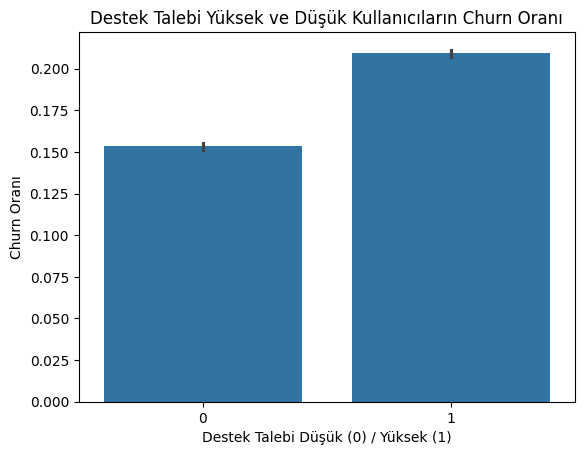

In [28]:
# Destek talebi yüksek ve düşük olan kullanıcıları etiketleme
df['high_support_tickets'] = (df['SupportTicketsPerMonth'] > df['SupportTicketsPerMonth'].mean()).astype(int)
df['low_support_tickets'] = (df['SupportTicketsPerMonth'] < df['SupportTicketsPerMonth'].mean()).astype(int)

# Destek talebi yüksek olan kullanıcıların churn oranını hesaplama
high_support_churn_rate = df[df['high_support_tickets'] == 1]['Churn'].mean()
print(f"Destek talebi yüksek kullanıcıların churn oranı: {high_support_churn_rate}")

# Destek talebi düşük olan kullanıcıların churn oranını hesaplama
low_support_churn_rate = df[df['low_support_tickets'] == 1]['Churn'].mean()
print(f"Destek talebi düşük kullanıcıların churn oranı: {low_support_churn_rate}")


# Destek talebi yüksek ve düşük kullanıcıların churn oranlarını karşılaştırma
sns.barplot(x='high_support_tickets', y='Churn', data=df)
plt.title('Destek Talebi Yüksek ve Düşük Kullanıcıların Churn Oranı')
plt.xlabel('Destek Talebi Düşük (0) / Yüksek (1)')
plt.ylabel('Churn Oranı')
plt.show()

Yüksek destek talebi olan ve düşük destek talebi olan aboneler arasında anlamlı bir churn farkı olduğu için oluşturduğum low_support_tickets özniteliğiyle devam ediyorum. High_support_tickets özniteliğini düşüreceğim iki öznitelik de aynı şeyi ifade ettiği için biriyle ilerlememiz yeterli

In [29]:
df.drop(['high_support_tickets'], axis=1, inplace=True)

In [30]:
# Yüksek ücret ödeyen ve düşük ücret ödeyen kullanıcıları belirleme
df['high_monthly_charge'] = (df['MonthlyCharges'] > df['MonthlyCharges'].mean()).astype(int)

# Yüksek ücret ödeyen kullanıcıların churn oranını hesaplama
high_charge_churn_rate = df[df['high_monthly_charge'] == 1]['Churn'].mean()

# Düşük ücret ödeyen kullanıcıların churn oranını hesaplama
low_charge_churn_rate = df[df['high_monthly_charge'] == 0]['Churn'].mean()

print(f"Yüksek Ücret Ödeyen Kullanıcıların Churn Oranı: {high_charge_churn_rate}")
print(f"Düşük Ücret Ödeyen Kullanıcıların Churn Oranı: {low_charge_churn_rate}")


Yüksek Ücret Ödeyen Kullanıcıların Churn Oranı: 0.21443036936826138
Düşük Ücret Ödeyen Kullanıcıların Churn Oranı: 0.14799461509415376


ID sütunları gibi benzersiz değer içeren öznitelikler model tahmininde anlam taşımaz bu sebeple bu sütunu düşürüyoruz:

In [31]:
df.drop(['CustomerID'], axis=1, inplace=True)


Öncelikle string değerlere (Yes/No , True/False) sahip olan özniteliklerin değerlerini Label Encodingle 0 ve 1 olarak değiştiriyoruz:

In [32]:
bool_columns = df.columns[df.nunique() == 2]  # Sadece 2 benzersiz değeri olan sütunları seç
print(bool_columns)

Index(['PaperlessBilling', 'MultiDeviceAccess', 'Gender', 'ParentalControl',
       'SubtitlesEnabled', 'Churn', 'is_low_paying_high_usage', 'heavy_user',
       'heavy_user_churned', 'high_churn_risk', 'low_support_tickets',
       'high_monthly_charge'],
      dtype='object')


In [33]:
columns_to_encode = ['PaperlessBilling', 'MultiDeviceAccess', 'ParentalControl', 'SubtitlesEnabled','Gender']
le = LabelEncoder()

for col in columns_to_encode:
    df[col] = le.fit_transform(df[col])


In [34]:
df.head()

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ParentalControl,SubtitlesEnabled,Churn,is_low_paying_high_usage,heavy_user,heavy_user_churned,churn_rate_by_combination,high_churn_risk,low_support_tickets,high_monthly_charge
0,20,11.055215,221.104302,Premium,Mailed check,0,Both,0,Mobile,36.758104,...,0,0,0,1,1,False,0.182733,0,1,0
1,57,5.175208,294.986882,Basic,Credit card,1,Movies,0,Tablet,32.450568,...,0,1,0,1,1,False,0.170837,0,0,0
2,73,12.106657,883.785952,Basic,Mailed check,1,Movies,0,Computer,7.395160,...,1,1,0,0,0,False,0.206873,0,0,0
3,32,7.263743,232.439774,Basic,Electronic check,0,TV Shows,0,Tablet,27.960389,...,1,1,0,1,1,False,0.203122,0,1,0
4,57,16.953078,966.325422,Premium,Electronic check,1,TV Shows,0,TV,20.083397,...,0,0,0,0,0,False,0.175616,0,1,1


SubscriptionType sütunundaki Basic, Standart ve Premium değerleri arasında bi sıralama olduğu için Ordinal Encoding yapıyoruz:

In [35]:
df['SubscriptionType'] = df['SubscriptionType'].astype(str)



In [36]:
subscription_mapping = {'Basic': 0, 'Standard': 1, 'Premium': 2}
df['SubscriptionType'] = df['SubscriptionType'].map(subscription_mapping)
print(df)


        AccountAge  MonthlyCharges  TotalCharges  SubscriptionType  \
0               20       11.055215    221.104302                 2   
1               57        5.175208    294.986882                 0   
2               73       12.106657    883.785952                 0   
3               32        7.263743    232.439774                 0   
4               57       16.953078    966.325422                 2   
...            ...             ...           ...               ...   
243782          77        9.639902    742.272460                 0   
243783         117       13.049257   1526.763053                 2   
243784         113       14.514569   1640.146267                 2   
243785           7       18.140555    126.983887                 2   
243786          90       11.593774   1043.439704                 2   

           PaymentMethod  PaperlessBilling ContentType  MultiDeviceAccess  \
0           Mailed check                 0        Both                  0   
1    

In [37]:
# Kategorik sütunları seç
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Her bir kategorik sütundaki benzersiz değerlerin sayısını göster
for col in categorical_columns:
    print(f"Column: {col}")
    print(df[col].value_counts())
    print("\n")



Column: PaymentMethod
PaymentMethod
Electronic check    61313
Credit card         60924
Bank transfer       60797
Mailed check        60753
Name: count, dtype: int64


Column: ContentType
ContentType
Both        81737
TV Shows    81145
Movies      80905
Name: count, dtype: int64


Column: DeviceRegistered
DeviceRegistered
Computer    61147
Tablet      61143
Mobile      60914
TV          60583
Name: count, dtype: int64


Column: GenrePreference
GenrePreference
Comedy     49060
Fantasy    48955
Drama      48744
Action     48690
Sci-Fi     48338
Name: count, dtype: int64




Kalan kategorik verileri sayısal değerlere çevirmek için OneHotEncoding uygulayacağım, burada multicollinearity (çoklu doğrusal ilişki) sorununu çözmek için drop_first parametresini True olarak gireceğiz. Tüm kategorilerin kullanılması modelin gereksiz yere çok fazla parametre öğrenmesine yol açabilir. Örneğin 4 kategorili bir öznitelikte OneHotEncoding yaptığımızda her bir kategori için birer sütun olmak üzere 4 sütun oluşur , bunu drop_first parametresiyle 3 sütuna düşürürüz. Modelin 4 sütunu da öğrenmesine gerek yoktur, kalan 3 sütundaki verilerden zaten 4.sütun çıkarılabilir.

In [38]:
# Kategorik sütunları seç
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# One-Hot Encoding uygula ve df'yi güncelle
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Sonuçları kontrol et
print(df.columns)



Index(['AccountAge', 'MonthlyCharges', 'TotalCharges', 'SubscriptionType',
       'PaperlessBilling', 'MultiDeviceAccess', 'ViewingHoursPerWeek',
       'AverageViewingDuration', 'ContentDownloadsPerMonth', 'UserRating',
       'SupportTicketsPerMonth', 'Gender', 'WatchlistSize', 'ParentalControl',
       'SubtitlesEnabled', 'Churn', 'is_low_paying_high_usage', 'heavy_user',
       'heavy_user_churned', 'churn_rate_by_combination', 'high_churn_risk',
       'low_support_tickets', 'high_monthly_charge',
       'PaymentMethod_Credit card', 'PaymentMethod_Electronic check',
       'PaymentMethod_Mailed check', 'ContentType_Movies',
       'ContentType_TV Shows', 'DeviceRegistered_Mobile',
       'DeviceRegistered_TV', 'DeviceRegistered_Tablet',
       'GenrePreference_Comedy', 'GenrePreference_Drama',
       'GenrePreference_Fantasy', 'GenrePreference_Sci-Fi'],
      dtype='object')


In [39]:
df.head(100)

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaperlessBilling,MultiDeviceAccess,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,...,PaymentMethod_Mailed check,ContentType_Movies,ContentType_TV Shows,DeviceRegistered_Mobile,DeviceRegistered_TV,DeviceRegistered_Tablet,GenrePreference_Comedy,GenrePreference_Drama,GenrePreference_Fantasy,GenrePreference_Sci-Fi
0,20,11.055215,221.104302,2,0,0,36.758104,63.531377,10,2.176498,...,True,False,False,True,False,False,False,False,False,True
1,57,5.175208,294.986882,0,1,0,32.450568,25.725595,18,3.478632,...,False,True,False,False,False,True,False,False,False,False
2,73,12.106657,883.785952,0,1,0,7.395160,57.364061,23,4.238824,...,True,True,False,False,False,False,False,False,True,False
3,32,7.263743,232.439774,0,0,0,27.960389,131.537507,30,4.276013,...,False,False,True,False,False,True,False,True,False,False
4,57,16.953078,966.325422,2,1,0,20.083397,45.356653,20,3.616170,...,False,False,True,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,45,10.024971,451.123689,1,0,1,38.132395,100.721800,28,3.800887,...,False,True,False,False,True,False,False,False,False,True
96,40,11.565217,462.608696,1,1,0,7.216903,37.008206,28,1.746446,...,False,True,False,False,False,True,False,True,False,False
97,32,12.599678,403.189691,1,1,1,15.276395,129.071996,13,2.007952,...,False,False,True,False,False,True,True,False,False,False
98,36,10.082957,362.986452,0,1,0,20.917550,115.202409,11,2.040472,...,False,False,True,True,False,False,False,False,True,False


Kalan sayısal veriler içeren sütunlardan churn analizine etkisi olmayan sütunları belirlemek için feature selection yöntemi kullanıyorum:

MUTUAL INFORMATION İLE ÖZELLİK SEÇİMİ


In [40]:


# Bağımsız değişkenler (X) ve bağımlı değişken (y)
X = df.drop(columns=['Churn'])
y = df['Churn']

# Mutual Information hesaplama
mi = mutual_info_classif(X, y)

# Sonuçları DataFrame'de gösterme
mi_df = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mi})
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

# En yüksek mutual information değerlerine sahip özellikler
print(mi_df)


                           Feature  Mutual Information
17              heavy_user_churned            0.131423
16                      heavy_user            0.037606
21             high_monthly_charge            0.031925
20             low_support_tickets            0.031302
11                          Gender            0.029932
13                 ParentalControl            0.029416
14                SubtitlesEnabled            0.028432
4                 PaperlessBilling            0.027921
5                MultiDeviceAccess            0.027766
0                       AccountAge            0.020972
3                 SubscriptionType            0.015834
15        is_low_paying_high_usage            0.014525
26            ContentType_TV Shows            0.013602
25              ContentType_Movies            0.012277
7           AverageViewingDuration            0.009998
8         ContentDownloadsPerMonth            0.009975
19                 high_churn_risk            0.008332
2         

Burda 0.01 ve üzeri değere sahip öznitelikleri seçerek devam ediyorum.

In [41]:
# 0.01 ve üzerinde olan sütunları filtreleyelim
columns_to_keep = ['heavy_user_churned', 'heavy_user', 'high_monthly_charge', 'low_support_tickets', 'PaperlessBilling', 'Gender', 'ParentalControl', 'SubtitlesEnabled', 'MultiDeviceAccess', 'AccountAge', 'SubscriptionType', 'is_low_paying_high_usage', 'ContentType_Movies', 'ContentType_TV Shows', 'ContentDownloadsPerMonth', 'AverageViewingDuration'
,'Churn']

# DataFrame'den sadece bu sütunları bırakın
df = df[columns_to_keep]



BU adımda “churn olan” ve “churn olmayan” örnek veri sayısını buluyoruz. Amacımız bu tarz veri setlerindeki en büyük problemlerden birisi olan “sınıf dengesizliği” (class imbalance) problemini ortadan kaldırmak.


In [42]:
# Churn sütunundaki değerlerin sayısını göster
churn_counts = df['Churn'].value_counts()

print(churn_counts)


Churn
0    199605
1     44182
Name: count, dtype: int64


Churn olan 44182 satır olduğu için churn olmayandan da bu sayıda satır alarak class imbalance'ı ortadan kaldırıyorum.

In [43]:
# Churn olan ve olmayan satırları ayır
churn_yes = df[df['Churn'] == 1]
churn_no = df[df['Churn'] == 0]

# Churn olmayan satırlardan rastgele, churn olan sayısına kadar seç
churn_no_downsampled = churn_no.sample(n=len(churn_yes), random_state=42)

# Churn olan ve downsample edilmiş churn olmayan verileri birleştir
df = pd.concat([churn_yes, churn_no_downsampled])

# Yeni veri setini karıştır (shuffling)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

print(df['Churn'].value_counts())


Churn
1    44182
0    44182
Name: count, dtype: int64


Preprocessing kısmında son adım olarak MinMaxScaler fonksiyonunu kullanarak ölçeklendirme işlemi yapıyoruz. Öncelikle veri setimizi -1 ve 1 arasında ölçeklendirip daha sonra dönüştürme işlemini uyguluyoruz.

In [44]:

# Eğitim ve test verisini parçalıyoruz --> 80% / 20%
X = df.iloc[:, df.columns != 'Churn']  # 'churn' dışındaki tüm sütunlar
Y = df['Churn']

# Eğitim ve test verisini ayırıyoruz
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Ölçeklendirme
scaler = preprocessing.MinMaxScaler((-1, 1))
scaler.fit(X)  # Tüm X verisine ölçeklendirme uyguluyoruz
XX_train = scaler.transform(X_train.values)  # Eğitim verisini ölçeklendiriyoruz
XX_test = scaler.transform(X_test.values)  # Test verisini ölçeklendiriyoruz
YY_train = Y_train.values
YY_test = Y_test.values



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2. ALGORİTMA SEÇİMİ VE MODEL PERFORMANS ANALİZİ

Bu kısımda Base algoritmalardan 3 tane Kollektif algoritmalardan 3 tane kullanacağım.
Base Algoritmalar: K-NN, SVM, Decision Tree
Kollektif Alforitmalar :

BASE ALGORİTMALAR


In [63]:


# K-NN modelini tanımla
knn = KNeighborsClassifier()

# Parametre optimizasyonu: n_neighbors, weights
param_grid_knn = {'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance']}
grid_knn = GridSearchCV(knn, param_grid_knn, cv=5, n_jobs=-1, scoring='accuracy')
grid_knn.fit(XX_train, YY_train)
best_knn = grid_knn.best_estimator_

# Test verisi ile tahmin yap
knn_pred = best_knn.predict(XX_test)
knn_pred_prob = best_knn.predict_proba(XX_test)[:, 1]  # ROC-AUC için olasılık

# Değerlendirme metriklerini hesapla
knn_accuracy = accuracy_score(YY_test, knn_pred)
knn_precision = precision_score(YY_test, knn_pred)
knn_recall = recall_score(YY_test, knn_pred)
knn_f1 = f1_score(YY_test, knn_pred)
knn_roc_auc = roc_auc_score(YY_test, knn_pred_prob)

# Metrikleri yazdır
print(f"🔹 Best K-NN Accuracy: {knn_accuracy:.4f}")
print(f"🔹 Precision: {knn_precision:.4f}")
print(f"🔹 Recall: {knn_recall:.4f}")
print(f"🔹 F1 Score: {knn_f1:.4f}")
print(f"🔹 ROC-AUC Score: {knn_roc_auc:.4f}")




🔹 Best K-NN Accuracy: 0.7939
🔹 Precision: 0.7645
🔹 Recall: 0.8433
🔹 F1 Score: 0.8020
🔹 ROC-AUC Score: 0.8988


In [64]:


# Decision Tree modelini tanımla
dt = DecisionTreeClassifier(random_state=0)

# Parametre optimizasyonu: max_depth, min_samples_split
param_grid_dt = {'max_depth': [3, 5, 7, 10], 'min_samples_split': [2, 5, 10]}
grid_dt = GridSearchCV(dt, param_grid_dt, cv=5, n_jobs=-1, scoring='accuracy')
grid_dt.fit(XX_train, YY_train)
best_dt = grid_dt.best_estimator_

# Test verisi ile tahmin yap
dt_pred = best_dt.predict(XX_test)
dt_pred_prob = best_dt.predict_proba(XX_test)[:, 1]  # ROC-AUC için olasılık

# Değerlendirme metriklerini hesapla
dt_accuracy = accuracy_score(YY_test, dt_pred)
dt_precision = precision_score(YY_test, dt_pred)
dt_recall = recall_score(YY_test, dt_pred)
dt_f1 = f1_score(YY_test, dt_pred)
dt_roc_auc = roc_auc_score(YY_test, dt_pred_prob)

# Metrikleri yazdır
print(f"🔹 Best Decision Tree Accuracy: {dt_accuracy:.4f}")
print(f"🔹 Precision: {dt_precision:.4f}")
print(f"🔹 Recall: {dt_recall:.4f}")
print(f"🔹 F1 Score: {dt_f1:.4f}")
print(f"🔹 ROC-AUC Score: {dt_roc_auc:.4f}")



🔹 Best Decision Tree Accuracy: 0.8154
🔹 Precision: 0.7726
🔹 Recall: 0.8883
🔹 F1 Score: 0.8264
🔹 ROC-AUC Score: 0.9117


In [69]:

# Pipeline içinde probability=True ekledik
svm_pipeline = Pipeline([
    ('svm', SVC(probability=True))
])

# Optimizasyon için parametreleri azalttık
svm_param_dist = {
    'svm__C': [0.1, 1, 10],
    'svm__gamma': ['scale'],  # 'auto' kaldırıldı
    'svm__kernel': ['linear', 'rbf']
}

# RandomizedSearchCV ile optimizasyon
svm_random = RandomizedSearchCV(
    svm_pipeline, svm_param_dist,
    n_iter=3,  # Daha az kombinasyon
    cv=2,  # Daha az katlı çapraz doğrulama
    n_jobs=-1,
    scoring='accuracy',
    random_state=0
)

# Modeli eğit
svm_random.fit(XX_train, YY_train)

# En iyi modeli al
best_svm = svm_random.best_estimator_

# Test verisi ile tahmin yap
svm_pred = best_svm.predict(XX_test)
svm_pred_prob = best_svm.predict_proba(XX_test)[:, 1]  # ROC-AUC için olasılık

# Değerlendirme metriklerini hesapla
svm_accuracy = accuracy_score(YY_test, svm_pred)
svm_precision = precision_score(YY_test, svm_pred)
svm_recall = recall_score(YY_test, svm_pred)
svm_f1 = f1_score(YY_test, svm_pred)
svm_roc_auc = roc_auc_score(YY_test, svm_pred_prob)

# Metrikleri yazdır
print(f"🔹 Best SVM Accuracy: {svm_accuracy:.4f}")
print(f"🔹 Precision: {svm_precision:.4f}")
print(f"🔹 Recall: {svm_recall:.4f}")
print(f"🔹 F1 Score: {svm_f1:.4f}")
print(f"🔹 ROC-AUC Score: {svm_roc_auc:.4f}")



🔹 Best SVM Accuracy: 0.8249
🔹 Precision: 0.7951
🔹 Recall: 0.8703
🔹 F1 Score: 0.8310
🔹 ROC-AUC Score: 0.9197


KOLLEKTİF ALGORİTMALAR

In [56]:


# Define BaggingClassifier model
bagging_model = BaggingClassifier(random_state=0)

# Hyperparameter distribution
bagging_param_dist = {
    'n_estimators': [50, 100, 150, 200],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0],
    'bootstrap': [True, False],
    'n_jobs': [-1]
}

# Use RandomizedSearchCV for hyperparameter optimization
bagging_random = RandomizedSearchCV(bagging_model, bagging_param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=0)
bagging_random.fit(XX_train, YY_train)

# Best model after tuning
best_bagging = bagging_random.best_estimator_

# Make predictions on the test set
bagging_pred = best_bagging.predict(XX_test)
bagging_pred_prob = best_bagging.predict_proba(XX_test)[:, 1]  # For ROC-AUC calculation

# Calculate evaluation metrics
bagging_accuracy = accuracy_score(YY_test, bagging_pred)
bagging_precision = precision_score(YY_test, bagging_pred)
bagging_recall = recall_score(YY_test, bagging_pred)
bagging_f1 = f1_score(YY_test, bagging_pred)
bagging_roc_auc = roc_auc_score(YY_test, bagging_pred_prob)

# Print evaluation metrics
print(f"🔹 Best Bagging Classifier Accuracy: {bagging_accuracy:.4f}")
print(f"🔹 Precision: {bagging_precision:.4f}")
print(f"🔹 Recall: {bagging_recall:.4f}")
print(f"🔹 F1 Score: {bagging_f1:.4f}")
print(f"🔹 ROC-AUC Score: {bagging_roc_auc:.4f}")


🔹 Best Bagging Classifier Accuracy: 0.8128
🔹 Precision: 0.7878
🔹 Recall: 0.8508
🔹 F1 Score: 0.8181
🔹 ROC-AUC Score: 0.9126


In [59]:


# XGBoost modelini tanımla
xgboost_model = xgb.XGBClassifier(random_state=0, eval_metric='mlogloss')

# Hiperparametre aralığı
xgb_param_dist = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# RandomizedSearchCV ile hiperparametre araması yapıyoruz
xgb_random = RandomizedSearchCV(xgboost_model, xgb_param_dist, n_iter=10, cv=5, n_jobs=-1, scoring='accuracy', random_state=0)
xgb_random.fit(XX_train, YY_train)

# En iyi modeli al
best_xgb = xgb_random.best_estimator_

# Test verisi ile tahmin yap
xgb_pred = best_xgb.predict(XX_test)
xgb_pred_prob = best_xgb.predict_proba(XX_test)[:, 1]  # ROC-AUC için olasılık

# Değerlendirme metriklerini hesapla
xgb_accuracy = accuracy_score(YY_test, xgb_pred)
xgb_precision = precision_score(YY_test, xgb_pred)
xgb_recall = recall_score(YY_test, xgb_pred)
xgb_f1 = f1_score(YY_test, xgb_pred)
xgb_roc_auc = roc_auc_score(YY_test, xgb_pred_prob)

# Metrikleri yazdır
print(f"🔹 Best XGBoost Accuracy: {xgb_accuracy:.4f}")
print(f"🔹 Precision: {xgb_precision:.4f}")
print(f"🔹 Recall: {xgb_recall:.4f}")
print(f"🔹 F1 Score: {xgb_f1:.4f}")
print(f"🔹 ROC-AUC Score: {xgb_roc_auc:.4f}")


🔹 Best XGBoost Accuracy: 0.8240
🔹 Precision: 0.7942
🔹 Recall: 0.8698
🔹 F1 Score: 0.8303
🔹 ROC-AUC Score: 0.9191


In [61]:

# Random Forest modelini tanımla
rf = RandomForestClassifier(random_state=0)

# Hiperparametre aralığı
rf_param_dist = {
    'n_estimators': np.arange(50, 201, 50),
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# RandomizedSearchCV ile hiperparametre optimizasyonu
rf_random = RandomizedSearchCV(rf, rf_param_dist, n_iter=10, cv=5, n_jobs=-1, scoring='accuracy', random_state=0)
rf_random.fit(XX_train, YY_train)

# En iyi modeli al
best_rf = rf_random.best_estimator_

# En iyi modeli ile test verisi üzerinde tahmin yap
rf_pred = best_rf.predict(XX_test)
rf_pred_prob = best_rf.predict_proba(XX_test)[:, 1]  # ROC-AUC için olasılık

# Değerlendirme metriklerini hesapla
rf_accuracy = accuracy_score(YY_test, rf_pred)
rf_precision = precision_score(YY_test, rf_pred)
rf_recall = recall_score(YY_test, rf_pred)
rf_f1 = f1_score(YY_test, rf_pred)
rf_roc_auc = roc_auc_score(YY_test, rf_pred_prob)

# Metrikleri yazdır
print(f"🔹 Best Random Forest Accuracy: {rf_accuracy:.4f}")
print(f"🔹 Precision: {rf_precision:.4f}")
print(f"🔹 Recall: {rf_recall:.4f}")
print(f"🔹 F1 Score: {rf_f1:.4f}")
print(f"🔹 ROC-AUC Score: {rf_roc_auc:.4f}")



🔹 Best Random Forest Accuracy: 0.8231
🔹 Precision: 0.7925
🔹 Recall: 0.8702
🔹 F1 Score: 0.8296
🔹 ROC-AUC Score: 0.9184


DERİN ÖĞRENME MODELLERİ

In [55]:


# Modeli tanımla
ann_model = Sequential()

# Giriş katmanı
ann_model.add(Dense(256, input_dim=XX_train.shape[1]))
ann_model.add(BatchNormalization())
ann_model.add(LeakyReLU(alpha=0.01))  # LeakyReLU aktivasyonu
ann_model.add(Dropout(0.3))  # Hafif dropout oranı artırıldı

# 1. Gizli katman
ann_model.add(Dense(128))
ann_model.add(BatchNormalization())
ann_model.add(LeakyReLU(alpha=0.01))
ann_model.add(Dropout(0.3))

# 2. Gizli katman
ann_model.add(Dense(64))
ann_model.add(BatchNormalization())
ann_model.add(LeakyReLU(alpha=0.01))
ann_model.add(Dropout(0.2))

# Çıkış katmanı
ann_model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Modeli derleme
ann_model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0005), metrics=['accuracy'])

# Callback'ler: EarlyStopping, ReduceLROnPlateau ve ModelCheckpoint
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, verbose=1)

# Modeli eğitme
history = ann_model.fit(
    XX_train, YY_train,
    epochs=50,  # Daha fazla epoch ile model eğitimi
    batch_size=128,  # Batch size artırılabilir
    validation_data=(XX_test, YY_test),
    verbose=1,
    callbacks=[early_stop, reduce_lr, checkpoint]
)

# En iyi modeli yükle
ann_model.load_weights('best_model.h5')

# Test verisi ile tahmin yap
ann_pred = ann_model.predict(XX_test)
ann_pred_classes = (ann_pred > 0.5).astype(int)  # 0.5 eşik ile sınıflandır

# Model performansını değerlendirme
ann_accuracy = accuracy_score(YY_test, ann_pred_classes)
ann_precision = precision_score(YY_test, ann_pred_classes)
ann_recall = recall_score(YY_test, ann_pred_classes)
ann_f1 = f1_score(YY_test, ann_pred_classes)
ann_roc_auc = roc_auc_score(YY_test, ann_pred)

# Metrikleri yazdırma
print(f"🔹 ANN Accuracy: {ann_accuracy:.4f}")
print(f"🔹 Precision: {ann_precision:.4f}")
print(f"🔹 Recall: {ann_recall:.4f}")
print(f"🔹 F1 Score: {ann_f1:.4f}")
print(f"🔹 ROC-AUC Score: {ann_roc_auc:.4f}")


Epoch 1/50
550/553 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7458 - loss: 0.4589
Epoch 1: val_loss improved from inf to 0.33565, saving model to best_model.h5


553/553 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.7461 - loss: 0.4584 - val_accuracy: 0.8206 - val_loss: 0.3357 - learning_rate: 5.0000e-04
Epoch 2/50
549/553 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8114 - loss: 0.3436
Epoch 2: val_loss improved from 0.33565 to 0.33231, saving model to best_model.h5


553/553 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.8114 - loss: 0.3436 - val_accuracy: 0.8214 - val_loss: 0.3323 - learning_rate: 5.0000e-04
Epoch 3/50
551/553 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8159 - loss: 0.3375
Epoch 3: val_loss did not improve from 0.33231
553/553 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.8159 - loss: 0.3375 - val_accuracy: 0.8244 - val_loss: 0.3326 - learning_rate: 5.0000e-04
Epoch 4/50
552/553 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8211 - loss: 0.3334
Epoch 4: val_loss improved from 0.33231 to 0.33125, saving model to best_model.h5


553/553 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.8211 - loss: 0.3334 - val_accuracy: 0.8239 - val_loss: 0.3313 - learning_rate: 5.0000e-04
Epoch 5/50
551/553 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8185 - loss: 0.3323
Epoch 5: val_loss did not improve from 0.33125
553/553 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.8185 - loss: 0.3323 - val_accuracy: 0.8245 - val_loss: 0.3313 - learning_rate: 5.0000e-04
Epoch 6/50
551/553 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8197 - loss: 0.3339
Epoch 6: val_loss improved from 0.33125 to 0.33088, saving model to best_model.h5


553/553 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8197 - loss: 0.3339 - val_accuracy: 0.8237 - val_loss: 0.3309 - learning_rate: 5.0000e-04
Epoch 7/50
546/553 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8182 - loss: 0.3351
Epoch 7: val_loss improved from 0.33088 to 0.33049, saving model to best_model.h5


553/553 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8182 - loss: 0.3351 - val_accuracy: 0.8236 - val_loss: 0.3305 - learning_rate: 5.0000e-04
Epoch 8/50
547/553 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8241 - loss: 0.3300
Epoch 8: val_loss did not improve from 0.33049
553/553 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8241 - loss: 0.3301 - val_accuracy: 0.8232 - val_loss: 0.3311 - learning_rate: 5.0000e-04
Epoch 9/50
548/553 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8180 - loss: 0.3344
Epoch 9: val_loss did not improve from 0.33049
553/553 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8180 - loss: 0.3344 - val_accuracy: 0.8231 - val_loss: 0.3310 - learning_rate: 5.0000e-04
Epoch 10/50
547/553 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8222 - loss: 0.3327
Epoch 10: val_loss improved from 0.33049 to 0.33043, saving model to best_model.h5


553/553 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8222 - loss: 0.3327 - val_accuracy: 0.8226 - val_loss: 0.3304 - learning_rate: 5.0000e-04
Epoch 11/50
545/553 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8173 - loss: 0.3333
Epoch 11: val_loss improved from 0.33043 to 0.33012, saving model to best_model.h5


553/553 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8174 - loss: 0.3332 - val_accuracy: 0.8230 - val_loss: 0.3301 - learning_rate: 5.0000e-04
Epoch 12/50
550/553 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8213 - loss: 0.3314
Epoch 12: val_loss did not improve from 0.33012
553/553 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8213 - loss: 0.3314 - val_accuracy: 0.8233 - val_loss: 0.3310 - learning_rate: 5.0000e-04
Epoch 13/50
552/553 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8202 - loss: 0.3337
Epoch 13: val_loss did not improve from 0.33012
553/553 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8202 - loss: 0.3337 - val_accuracy: 0.8233 - val_loss: 0.3303 - learning_rate: 5.0000e-04
Epoch 14/50
549/553 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8212 - loss: 0.3324
Epoch 14: val_loss did not improve from 0.33012
553/553 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8211 - loss: 0.3324 - val_accuracy: 0.8236 - val_loss: 0.3302 - learning_rate: 5.0000e-04
Epoch 15/50
54

In [53]:


# Modeli Tanımla
tabnet_model = TabNetClassifier(
    n_d=32,  # Vektör boyutu
    n_a=32,  # Dikkat vektörü boyutu
    n_steps=3,  # Daha az adım
    gamma=1.3,
    lambda_sparse=1e-3,  # Seyreklik kaybı
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=0.005),  # Öğrenme oranı
    scheduler_params={"step_size":10, "gamma":0.9},  # Öğrenme oranı ayarı
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    verbose=10
)

# Eğitim işlemi
tabnet_model.fit(
    XX_train, YY_train,
    eval_set=[(XX_train, YY_train), (XX_test, YY_test)],
    eval_name=['train', 'valid'],
    eval_metric=['accuracy'],
    max_epochs=30,  # Eğitim süresini kısalt
    patience=7,  # Daha erken durdurma
    batch_size=512,  # Batch boyutunu büyük tutmak
    virtual_batch_size=128,  # Sanal batch boyutu
)

# Test veri seti üzerinde tahmin yap
tabnet_pred = tabnet_model.predict(XX_test)
tabnet_pred_prob = tabnet_model.predict_proba(XX_test)[:, 1]  # ROC-AUC için olasılık değerleri

# Model performansını değerlendirme
tabnet_accuracy = accuracy_score(YY_test, tabnet_pred)
tabnet_precision = precision_score(YY_test, tabnet_pred)
tabnet_recall = recall_score(YY_test, tabnet_pred)
tabnet_f1 = f1_score(YY_test, tabnet_pred)
tabnet_roc_auc = roc_auc_score(YY_test, tabnet_pred_prob)

# Metrikleri yazdırma
print(f"🔹 TabNet Accuracy: {tabnet_accuracy:.4f}")
print(f"🔹 Precision: {tabnet_precision:.4f}")
print(f"🔹 Recall: {tabnet_recall:.4f}")
print(f"🔹 F1 Score: {tabnet_f1:.4f}")
print(f"🔹 ROC-AUC Score: {tabnet_roc_auc:.4f}")


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.43584 | train_accuracy: 0.80292 | valid_accuracy: 0.79981 |  0:00:14s
epoch 10 | loss: 0.33289 | train_accuracy: 0.82194 | valid_accuracy: 0.82142 |  0:02:14s

Early stopping occurred at epoch 15 with best_epoch = 8 and best_valid_accuracy = 0.8238


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


🔹 TabNet Accuracy: 0.8238
🔹 Precision: 0.7918
🔹 Recall: 0.8736
🔹 F1 Score: 0.8307
🔹 ROC-AUC Score: 0.9175


**MODEL KARŞILAŞTIRMA**

In [76]:

# Modellerin sonuçları (accuracy, precision, recall, f1, roc_auc)
results = {
    'Model': ['TabNet', 'ANN', 'Bagging', 'XGBoost', 'Random Forest',
              'K-NN', 'Decision Tree', 'SVM'],
    'Accuracy': [tabnet_accuracy, ann_accuracy, bagging_accuracy, xgb_accuracy, rf_accuracy,
                 knn_accuracy, dt_accuracy, svm_accuracy],
    'Precision': [tabnet_precision, ann_precision, bagging_precision, xgb_precision,  rf_precision,
                   knn_precision, dt_precision, svm_precision],
    'Recall': [tabnet_recall, ann_recall, bagging_recall, xgb_recall, rf_recall,
               knn_recall, dt_recall, svm_recall],
    'F1 Score': [tabnet_f1, ann_f1, bagging_f1, xgb_f1, rf_f1, knn_f1, dt_f1, svm_f1],
    'ROC-AUC': [tabnet_roc_auc, ann_roc_auc, bagging_roc_auc, xgb_roc_auc, rf_roc_auc,
                knn_roc_auc, dt_roc_auc, svm_roc_auc]
}

results_df = pd.DataFrame(results)
# En iyi 3 değeri yeşil renkle vurgulayan stil fonksiyonu
def highlight_top3(s):
    top3 = s.nlargest(3)  # En büyük 3 değeri al
    return ['color: green; font-weight: bold' if v in top3.values else '' for v in s]

# Tüm metrik sütunlarına stil uygula
styled_df = results_df.style.apply(highlight_top3, subset=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC-AUC'])

# DataFrame'i görüntüle
styled_df


,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC
0,TabNet,0.823799,0.791792,0.873642,0.830706,0.917514
1,ANN,0.822950,0.793847,0.867467,0.829026,0.919133
2,Bagging,0.812765,0.787802,0.850772,0.818077,0.912617
3,XGBoost,0.824025,0.794194,0.869754,0.830259,0.919083
4,Random Forest,0.823063,0.792543,0.870212,0.829563,0.918353
5,K-NN,0.793923,0.764486,0.843339,0.801979,0.898768
6,Decision Tree,0.815368,0.772628,0.888279,0.826427,0.911674
7,SVM,0.824874,0.795132,0.870326,0.831031,0.919690
